In [6]:
import pandas as pd
df = pd.read_csv("merged_dataset.csv")
df

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [7]:
missing_values = df.isnull().sum()
missing_values

,0
Text,0
Language,0


In [8]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 207


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset
data = pd.read_csv('merged_dataset.csv')

# Step 1: Remove duplicates based on the 'Text' column
data_cleaned = data.drop_duplicates(subset=['Text'], keep='first').copy()

# Step 2: Convert the 'Text' column to lowercase and remove extra white spaces using regex
data_cleaned['Text'] = data_cleaned['Text'].apply(lambda x: re.sub(r'\s+', ' ', x.strip().lower()) if isinstance(x, str) else x)

# Step 3: Initialize LabelEncoder and encode the 'Language' column
le = LabelEncoder()
data_cleaned['Language'] = le.fit_transform(data_cleaned['Language'])

# Step 4: Saved the cleaned and encoded dataset to a new CSV file
data_cleaned.to_csv('cleaned_encoded_dataset.csv', index=False)

# Print the first few rows to inspect the result
# print(data_cleaned.head())
data_cleaned

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,5
1,sebes joseph pereira thomas på eng the jesuits...,24
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,27
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,26
4,de spons behoort tot het geslacht haliclona en...,3
...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,13
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,13
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,13
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,13


In [10]:
unique_values = data_cleaned.isnull().sum()
unique_values

,0
Text,0
Language,0


#Tokenization and Padding

In [11]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the cleaned and encoded dataset
data_cleaned = pd.read_csv('cleaned_encoded_dataset.csv')

# Extract features (X) and labels (y)
X = data_cleaned['Text'].values  # Text data
y = data_cleaned['Language'].values  # Encoded labels

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure no float values (convert to string)
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Check for missing values
print("Missing values in X_train:", pd.Series(X_train).isnull().sum())
print("Missing values in X_test:", pd.Series(X_test).isnull().sum())

# Tokenization
vocab_size = 10000  # Vocabulary size
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_length = 126
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Checking vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

# Printing tokenized and padded sequences (corrected variable names)
print("Tokenized Sequence (Train):", X_train_seq[:1])
print("Padded Sequence (Train):", X_train_pad[:1])
print("Tokenized Sequence (Test):", X_test_seq[:1])
print("Padded Sequence (Test):", X_test_pad[:1])

# Printing shapes to verify
print("X_train shape:", X_train_pad.shape)
print("X_test shape:", X_test_pad.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Missing values in X_train: 0
Missing values in X_test: 0
Vocabulary Size: 260837
Tokenized Sequence (Train): [[1, 1, 1, 1, 836, 203, 1, 88, 1, 48, 1, 14, 1, 993, 1400, 2645, 14, 1, 732, 1, 14, 1, 48, 26, 2187, 2645, 732, 1, 1, 14, 1]]
Padded Sequence (Train): [[   1    1    1    1  836  203    1   88    1   48    1   14    1  993
  1400 2645   14    1  732    1   14    1   48   26 2187 2645  732    1
     1   14    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]]
Tokenized Sequence (Test): [[2, 4990, 33, 1, 33, 6630, 7431, 5948, 1, 188, 1656, 2834, 81,

In [23]:
import joblib

# Save the tokenizer
joblib.dump(tokenizer, 'tokenizer2.joblib')
print("Tokenizer saved as 'tokenizer2.joblib'.")

# Save the label encoder
joblib.dump(le, 'label_encoder2.joblib')
print("Label Encoder saved as 'label_encoder2.joblib'.")


Tokenizer saved as 'tokenizer2.joblib'.
Label Encoder saved as 'label_encoder2.joblib'.


#Basic Neural Network

In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten

# Define the Baseline Neural Network model
num_classes = len(set(y_train))  # Number of unique classes in the dataset
model_nn = Sequential(name="My_Baseline_NN_Model",
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),  # Embedding layer
        Flatten(),  # Flatten the embedding output to remove extra dimensions
        Dense(64, activation='relu'),  # Fully connected layer
        Dropout(0.5),  # Dropout to prevent overfitting
        Dense(num_classes, activation='softmax')  # Output layer
    ]
)

# Model's name and parameters summary
print(f"Model Name: {model_nn.name}")
model_nn.summary()

# Compile the model
model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Baseline Neural Network model
history_nn = model_nn.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model Name: My_Baseline_NN_Model


Model: "My_Baseline_NN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 530s 655ms/step - accuracy: 0.4163 - loss: 2.1329 - val_accuracy: 0.8923 - val_loss: 0.3867
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 529s 658ms/step - accuracy: 0.8871 - loss: 0.4121 - val_accuracy: 0.9129 - val_loss: 0.3054
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 555s 650ms/step - accuracy: 0.9188 - loss: 0.2816 - val_accuracy: 0.9189 - val_loss: 0.2970
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 528s 608ms/step - accuracy: 0.9303 - loss: 0.2317 - val_accuracy: 0.9183 - val_loss: 0.3093
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 504s 610ms/step - accuracy: 0.9324 - loss: 0.2133 - val_accuracy: 0.9153 - val_loss: 0.3284
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 499s 606ms/step - accuracy: 0.9393 - loss: 0.1921 - val_accuracy: 0.9188 - val_loss: 0.3338
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 474s 572ms/step - accuracy: 0.9396 - loss: 0.1820 - val_accuracy: 0.9169 - val_loss: 0.3535
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 475s 538ms/step - accuracy: 0.9425 -

#Long Short-Term Memory(LSTM)

In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

# Define the LSTM model
num_classes = len(set(y_train))
model_lstm = Sequential(name="My_LSTM_Model",
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ]
)

# Model's name and parameters summary
print(f"Model Name: {model_lstm.name}")
model_lstm.summary()

# Compile the model
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history_lstm = model_lstm.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model Name: My_LSTM_Model


Model: "My_LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 529s 650ms/step - accuracy: 0.0681 - loss: 3.3238 - val_accuracy: 0.1133 - val_loss: 3.0183
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 541s 673ms/step - accuracy: 0.1138 - loss: 3.0195 - val_accuracy: 0.1155 - val_loss: 2.9603
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 552s 661ms/step - accuracy: 0.0964 - loss: 3.0763 - val_accuracy: 0.1908 - val_loss: 2.8526
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 576s 678ms/step - accuracy: 0.2016 - loss: 2.6367 - val_accuracy: 0.5724 - val_loss: 1.4942
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 544s 656ms/step - accuracy: 0.6038 - loss: 1.3431 - val_accuracy: 0.8290 - val_loss: 0.6459
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 544s 634ms/step - accuracy: 0.8166 - loss: 0.7047 - val_accuracy: 0.8848 - val_loss: 0.4696
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 570s 644ms/step - accuracy: 0.8821 - loss: 0.4778 - val_accuracy: 0.9057 - val_loss: 0.3810
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 574s 714ms/step - accuracy: 0.9155 -

#Gated Recurrent Unit(GRU)

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, Dropout

# Define the GRU model
num_classes = len(set(y_train))  # Number of unique classes in the target variable
model_gru = Sequential(name="My_GRU_Model",
    layers=[
        Embedding(input_dim=vocab_size, output_dim=128),  # Embedding layer
        GRU(64, return_sequences=False),  # GRU layer with 64 units
        Dropout(0.5),  # Dropout for regularization
        Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
    ]
)

# Model's name and parameters summary
print(f"Model Name: {model_gru.name}")
model_gru.summary()

# Compile the model
model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the GRU model
history_gru = model_gru.fit(
    X_train_pad,  # Padded training sequences
    y_train,      # Corresponding labels
    epochs=10,    # Number of epochs
    batch_size=32,  # Batch size
    validation_data=(X_test_pad, y_test)  # Validation data
)

# Evaluate the model
loss, accuracy = model_gru.evaluate(X_test_pad, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Model Name: My_GRU_Model


Model: "My_GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 544s 671ms/step - accuracy: 0.0800 - loss: 3.2734 - val_accuracy: 0.3850 - val_loss: 1.9561
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 543s 648ms/step - accuracy: 0.5444 - loss: 1.5496 - val_accuracy: 0.8450 - val_loss: 0.5603
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 531s 661ms/step - accuracy: 0.8635 - loss: 0.5131 - val_accuracy: 0.9020 - val_loss: 0.3638
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 547s 642ms/step - accuracy: 0.9199 - loss: 0.3215 - val_accuracy: 0.9060 - val_loss: 0.3575
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 579s 662ms/step - accuracy: 0.9311 - loss: 0.2554 - val_accuracy: 0.9077 - val_loss: 0.3370
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 584s 690ms/step - accuracy: 0.9362 - loss: 0.2312 - val_accuracy: 0.9111 - val_loss: 0.3193
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 578s 710ms/step - accuracy: 0.9405 - loss: 0.2063 - val_accuracy: 0.9104 - val_loss: 0.3376
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 585s 728ms/step - accuracy: 0.9411 -

In [22]:
# Save the NN model
model_nn.save('NN2.keras')
print("Neural Network model saved as 'NN2.keras'.")

# Save the LSTM model 
model_lstm.save('LSTM2.keras')
print("LSTM model saved as 'LSTM2.keras'.")

# Save the GRU model 
model_gru.save('GRU2.keras')
print("GRU model saved as 'GRU2.keras'.")

Neural Network model saved as 'NN2.keras'.
LSTM model saved as 'LSTM2.keras'.
GRU model saved as 'GRU2.keras'.


#Evaluating the Model

In [18]:
# Evaluate the models
accuracy_nn = model_nn.evaluate(X_test_pad, y_test, verbose=0)[1]  # Assuming `model_nn` is your neural network model
accuracy_lstm = model_lstm.evaluate(X_test_pad, y_test, verbose=0)[1]  # LSTM model
accuracy_gru = model_gru.evaluate(X_test_pad, y_test, verbose=0)[1]  # GRU model

print(f"NN Test Accuracy: {accuracy_nn * 100:.2f}%")
print(f"LSTM Test Accuracy: {accuracy_lstm * 100:.2f}%")
print(f"GRU Test Accuracy: {accuracy_gru * 100:.2f}%")


NN Test Accuracy: 92.00%
LSTM Test Accuracy: 90.73%
GRU Test Accuracy: 90.71%


#Training and Validation Accuracy

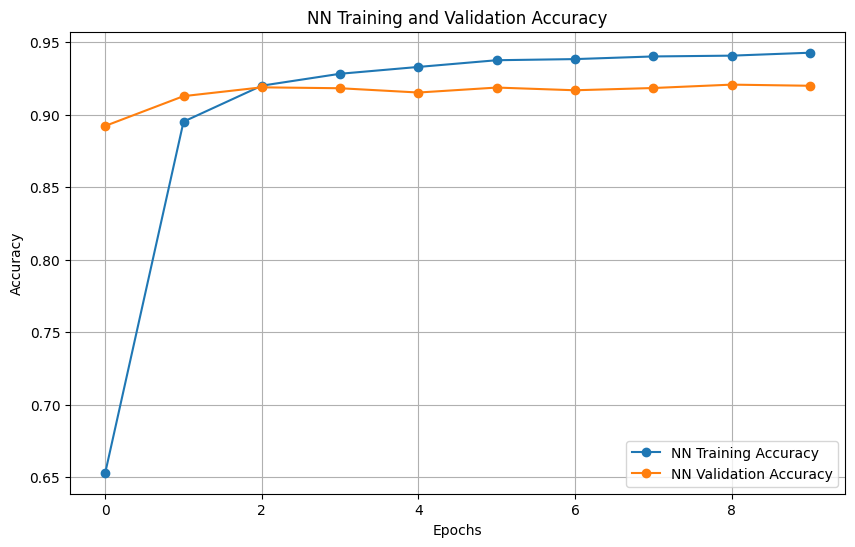

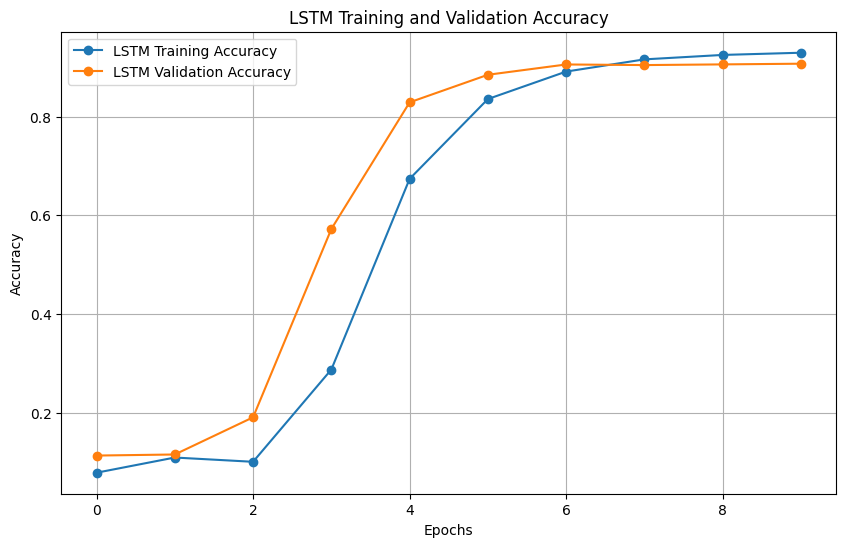

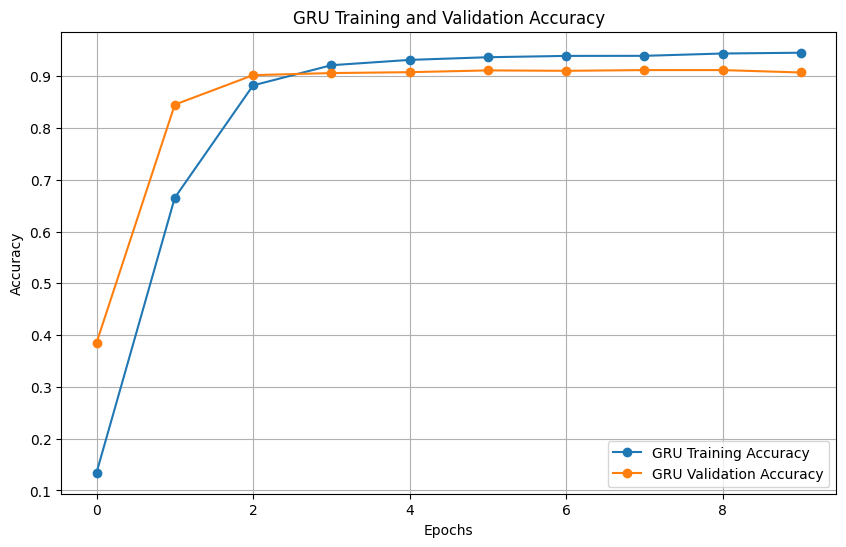

In [20]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(history_nn.history['accuracy'], label='NN Training Accuracy', marker='o')
plt.plot(history_nn.history['val_accuracy'], label='NN Validation Accuracy', marker='o')
plt.title('NN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy for LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy', marker='o')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy', marker='o')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Accuracy for GRU
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy', marker='o')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy', marker='o')
plt.title('GRU Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
